In [63]:
import numpy
import matplotlib.pyplot as plt

I want to reproduce the following graph:

<img src="matplotlib_complex_plot.jpg" alt="drawing" width="300px"/>

First, let's create the $\frac{1}{x}$ curve and the random points.

In [151]:
numberOfPoints = 50
xDomain = (1, 5)
f = lambda x: 1/x
yDomain = f(numpy.array(xDomain))
x = numpy.linspace(xDomain[0], xDomain[1], numberOfPoints)
y_inverse_x = f(x)
y_random = y_inverse_x * numpy.random.rand(*y_inverse_x.shape)

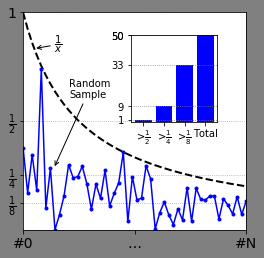

In [188]:
fig = plt.figure(1, figsize=(4,4), facecolor='gray')
ax = fig.add_subplot(1,1,1)

ax.plot(x, y_inverse_x, color='k', linestyle='--', linewidth=2, label=r'$\dfrac{1}{x}$')
ax.plot(x, y_random, color='blue', linestyle='-', marker='.', label='random sample'.title())

ax.set_xlim(xDomain)
ax.set_ylim(0, 1)

ax.annotate(
    s=r'$\dfrac{1}{x}$',
    xy=(1.2, f(1.2)),
    xytext=(20,0),
    textcoords='offset points',
    arrowprops={'arrowstyle':'->'}
)

pos = int(numpy.ceil(numberOfPoints/6))-3
ax.annotate(
    s='random\nsample'.title(),
    xy=(x[pos]+1/16, y_random[pos]),
    xytext=(15,70),
    textcoords='offset points',
    arrowprops={'arrowstyle':'->'}
)

xTicks = [x[0], numpy.median(x), x[-1]]
xTicksLabels = [r'#0', r'$\dots$', '#N']
ax.set_xticks(xTicks, minor=False)
ax.set_xticklabels(xTicksLabels, fontsize=14)

yTicks = [1, 1/2, 1/4, 1/8]
yTicksLabels = [r'1', r'$\frac{1}{2}$', r'$\frac{1}{4}$', r'$\frac{1}{8}$']
ax.set_yticks(yTicks, minor=False)
ax.set_yticklabels(yTicksLabels, fontsize=14)

ax.grid(which='major', axis='y', linestyle=':', color='gray', alpha=0.75)

histogramPosition = [0.5, 0.5, 0.3, 0.3]
hist = fig.add_axes(histogramPosition)
barLabels=[
    r'>$\frac{1}{2}$',
    r'>$\frac{1}{4}$',
    r'>$\frac{1}{8}$',
    'Total'
]
barCountage = [
    len(numpy.where(y_random>(1/2))[0]),
    len(numpy.where(y_random>(1/4))[0]),
    len(numpy.where(y_random>(1/8))[0]),
    numberOfPoints
]
hist.bar(barLabels,barCountage, color='blue')

yTicks = barCountage; yTicks.append(numberOfPoints)
hist.set_ylim([0, numberOfPoints])
hist.set_yticks(yTicks)
hist.grid(which='major', axis='y', linestyle=':', color='gray')

plt.show()